# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#summery">Summery</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this report, we will discuss patients' non-attendance to their appointments, and what are the reasons for their non-attendance, discuss them, and find a solution to them
I hope the report will be useful to you
### Dataset Description 
This dataset of 100,000 medical appointments focused on whether or not patients would show up for their appointments.

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 

In [1]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties

In [2]:
# read the CSV file
df = pd.read_csv('appointment.csv')

In [3]:
# view the first 5 row in dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# to print all column and there data type
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# to print the number of row and column of dataset
df.shape

(110527, 14)

In [6]:
# print the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning


In [7]:
# to find out the sum of null values 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
# rename the column to easy to call
df.rename(columns = {'No-show' : 'Noshow'}, inplace = True )
df.rename(columns = {'SMS_received' : 'SMSreceived'}, inplace = True )

In [9]:
# convert the data type
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMSreceived                     int64
Noshow                         object
dtype: object

In [10]:
# how many duplicated row 
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis




### What are the ages of the patients who do not attend the appointment?

### Is diabetes related to the patient's failure to attend the appointment?

### Does gender affect attendance for an appointment?

array([[<Axes: title={'center': 'PatientId'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'ScheduledDay'}>],
       [<Axes: title={'center': 'AppointmentDay'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Scholarship'}>],
       [<Axes: title={'center': 'Hipertension'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Alcoholism'}>],
       [<Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'SMSreceived'}>, <Axes: >]], dtype=object)

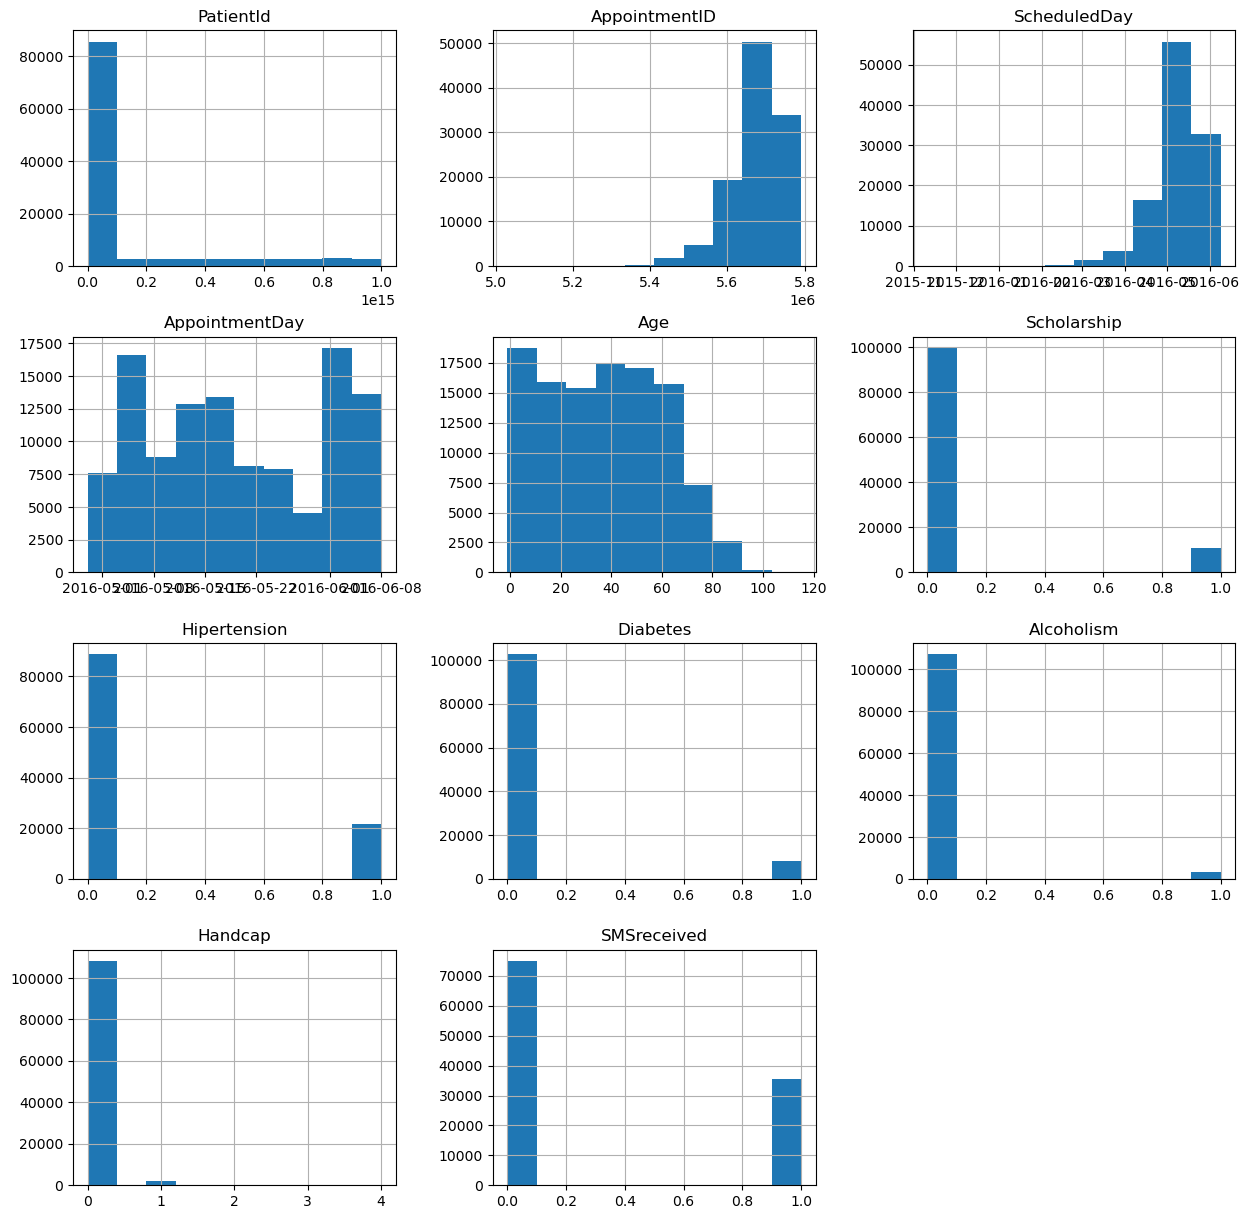

In [11]:
df.hist(figsize=(15,15))

<Axes: >

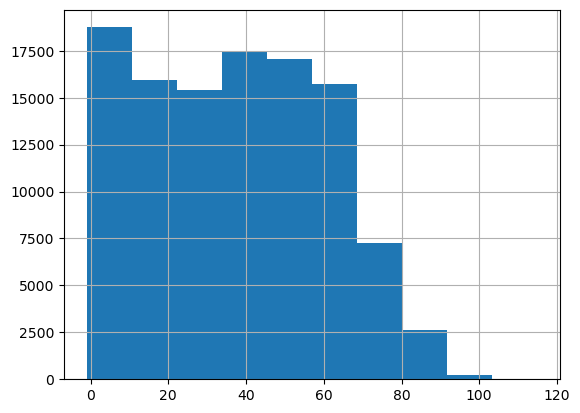

In [12]:
df.Age.hist()

<a id='conclusions'></a>
## Conclusions

### What are the ages of the patients who do not attend the appointment?

<Axes: >

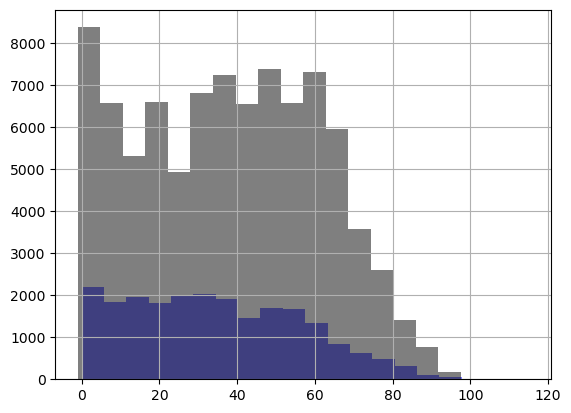

In [13]:
yes = df.Noshow == 'Yes'
no = df.Noshow == 'No'
df.Age[yes].hist(alpha=0.5, bins=20, color = 'blue', label='Yes')
df.Age[no].hist(alpha=0.5, bins=20, color = 'black', label='No')

Most of the patients who don't show up for appointments are actually very young

### Is diabetes related to the patient's failure to attend the appointment?

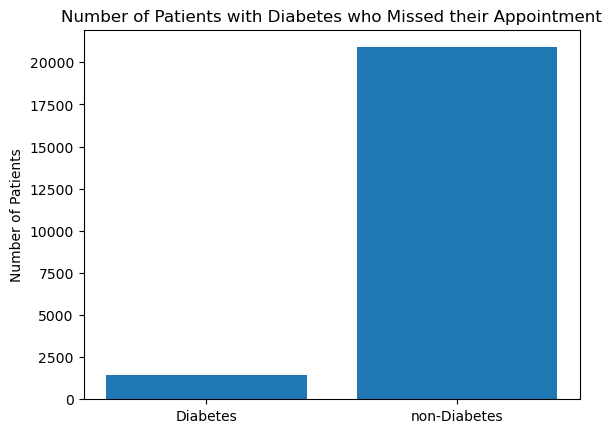

In [14]:
def BarPlot(num_yes, num_no):
    Di_yes = df.query("Diabetes == 1 & Noshow == 'Yes'")
    Di_no = df.query("Diabetes == 0 & Noshow == 'Yes'")

    num_yes = Di_yes['Diabetes'].count()
    num_no = Di_no['Diabetes'].count()


    locations = [1, 2]
    heights = [num_yes, num_no]
    labels = ['Diabetes', 'non-Diabetes']
    plt.bar(locations, heights, tick_label=labels)
    plt.title('Number of Patients with Diabetes who Missed their Appointment')
    plt.ylabel('Number of Patients')
    plt.show()
    
BarPlot("num_yes", "num_no")

Most patients who do not show up for appointments are actually non-diabetic

### Does gender affect attendance for an appointment?

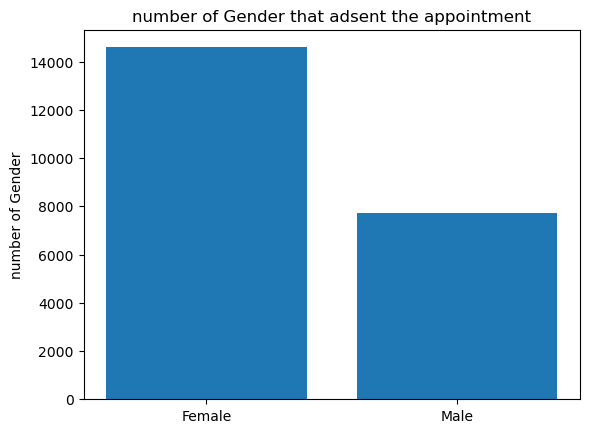

In [15]:
def BarPlot(num_Fe, num_Ma):
    
    Female = df.query("Gender == 'F' and Noshow == 'Yes'")
    Male = df.query("Gender == 'M' and Noshow == 'Yes'")

    num_Fe = Female['Gender'].count()
    num_Ma = Male['Gender'].count()
    
    locations = [1, 2]
    heights = [num_Fe, num_Ma]
    labels = ['Female', 'Male']
    plt.bar(locations, heights, tick_label=labels)
    plt.title('number of Gender that adsent the appointment')
    plt.ylabel('number of Gender')
    plt.show()
BarPlot("num_Fe", "num_Ma")

A large percentage of female patients do not attend appointments

## Summery

In this report, I dealt with the reason for patients not attending their appointments by asking and answering a number of questions, for example, by understanding the relationship between the patient's age and attending the appointment, and whether it has a relationship or not, and whether diabetes is the reason for the patient not attending his appointment. And about the patient's gender if there is a relationship between gender and the patient's absence.

This is a summary of the results
Most of the patients who don't show up for appointments are actually very young.
Most patients who do not show up for appointments are actually non-diabetic.
A large percentage of female patients do not attend appointments.

And one of the limitations and weaknesses is the limited data, and more procedures must be done and more data collected in the future to answer more accurately about the reason for patients not attending and ways to solve the problem.

## Submitting your Project 

In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1